###  Classificação Textual em documentos com relevante incidência de ruído - CTir.v0.1
##### Projeto didático apresentado no Curso:
***Inteligência Artificial na prática: Machine Learning*** / ESMPU - *Maio/2023*

---

Endereço do projeto: https://github.com/pro-chsmaia/projeto_cursoml_ctir

#### Importação de bibliotecas

In [1]:
import ctirlib_01 as cl

import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

#### Importação dos dados
- Vide requisitos do arquivo de dados em [README](https://github.com/pro-chsmaia/projeto_cursoml_ctir/blob/main/README.md)

In [2]:
# Campos: 'classe' e 'texto'
dfClasseTexto      = \
pd.read_csv('dados.csv', usecols=['classe', 'texto'])

dfClasseTextoRuido = \
pd.read_csv('dados.csv', usecols=['classe', 'textoComRuido'])
dfClasseTextoRuido.columns = ['classe','texto']

#### Parâmetros Gerais

In [3]:
listaDfQtLinhas             = [200, 500, 1000, 5000, 10000]
listaSgd_loss               = ['log_loss', 'hinge']
listaResultados             = []

#### 0. SGD Classifier loss='log_loss' sobre texto SEM e COM ruído

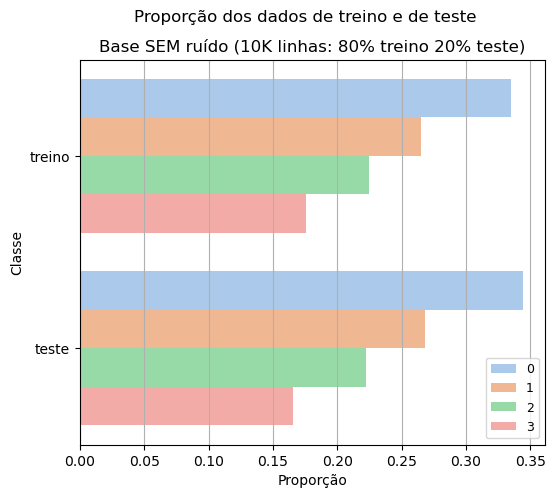

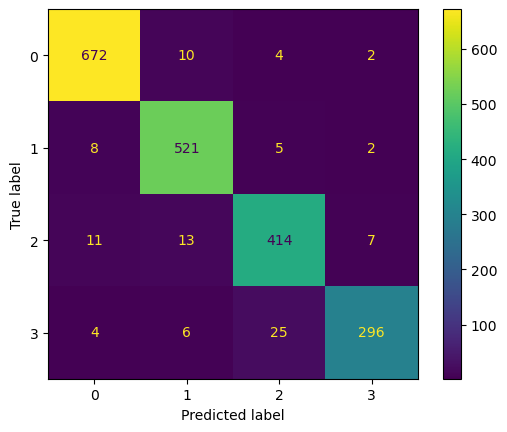

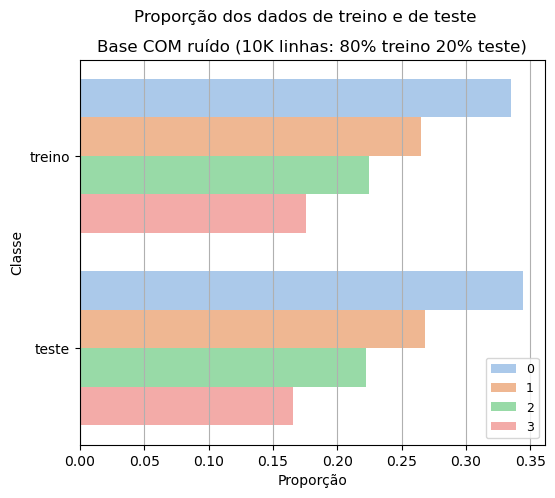

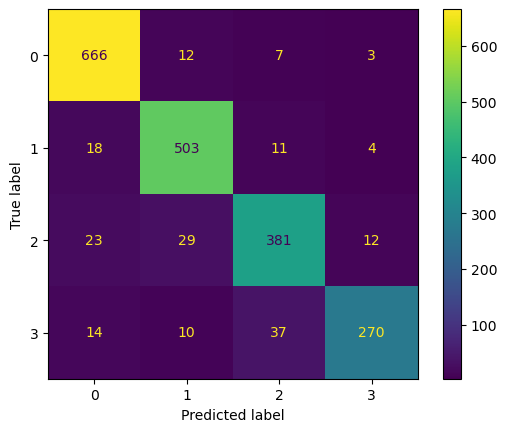

In [4]:
listaAcuraciasDfClasseTexto      = []
listaAcuraciasDfClasseTextoRuido = []
for i_DfQtLinhas in listaDfQtLinhas:
    #########################################################
    # Dados SEM ruído
    #########################################################
    # Dividir a amostra de dados em Treino e Teste (DataFrame, quantidade de linhas)
    X_treino, X_teste, y_treino, y_teste = \
    cl.dividirTreinoTeste(dfClasseTexto, i_DfQtLinhas)
       
    # Gerar Matriz Tf-idf
    vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
    cl.gerarMatrizTfidf(X_treino, X_teste)

    # Treinar modelo SGD
    acuracia_classificador = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss', True)

    listaAcuraciasDfClasseTexto.append([i_DfQtLinhas, acuracia_classificador[0], 'log_loss', 1, False])
    
    # Para dataset com 10K linhas
    #### Proporção das categorias entre dados de treino e de teste e matriz de confusão
    if (i_DfQtLinhas == 10000):
        tituloGrafico = 'Base SEM ruído (10K linhas: 80% treino 20% teste)'
        grafico = cl.graficoProporcaoTreinoTeste(y_treino, y_teste, tituloGrafico)
        ConfusionMatrixDisplay.from_estimator(acuracia_classificador[1], X_teste_tfidf, y_teste)
        
    #########################################################
    # Dados COM ruído
    #########################################################
    X_treino, X_teste, y_treino, y_teste = \
    cl.dividirTreinoTeste(dfClasseTextoRuido, i_DfQtLinhas)
    
    # Gerar Matriz Tf-idf
    vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
    cl.gerarMatrizTfidf(X_treino, X_teste)
    
    # Treinar modelo SGD
    acuracia_classificador = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss', True)

    listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuracia_classificador[0], 'log_loss', 1, False])

    # Para dataset com 10K linhas
    #### Proporção das categorias entre dados de treino e de teste e matriz de confusão
    if (i_DfQtLinhas == 10000):
        tituloGrafico = 'Base COM ruído (10K linhas: 80% treino 20% teste)'
        grafico = cl.graficoProporcaoTreinoTeste(y_treino, y_teste, tituloGrafico)
        ConfusionMatrixDisplay.from_estimator(acuracia_classificador[1], X_teste_tfidf, y_teste)

,qtLinhas,acuracia,sgd_loss,ruido,mindf,tfidf_limitado
4,10000,95.15,log_loss,False,1,False
9,10000,91.00,log_loss,True,1,False


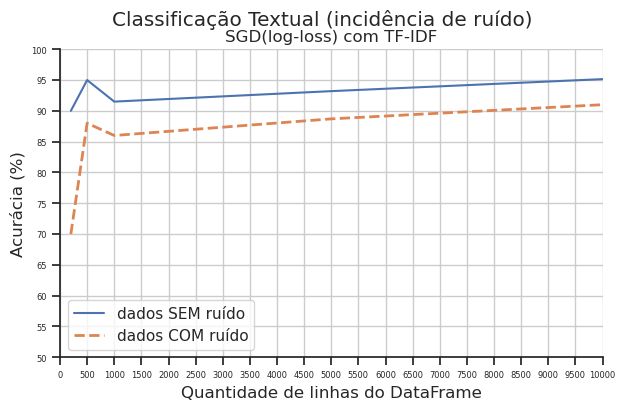

In [5]:
dfMedidasAcuracia = cl.gerarDfMedidasAcuracia(listaAcuraciasDfClasseTexto, listaAcuraciasDfClasseTextoRuido)
listaResultados  += dfMedidasAcuracia.values.tolist()
grAcuracia        = cl.graficoEvolucaoAcuracia(dfMedidasAcuracia, 'SGD(log-loss) com TF-IDF', \
                                               False, False, False, True, True)
dfMedidasAcuracia[dfMedidasAcuracia.qtLinhas == 10000]

#### 1. SGD Classifier loss='log_loss' com  mind_df = 4

In [6]:
listaAcuraciasDfClasseTexto      = []
listaAcuraciasDfClasseTextoRuido = []

listaMinimoDf = [1, 4]
for i_DfQtLinhas in listaDfQtLinhas:
    for i_MinimoDf in listaMinimoDf:
        #########################################################
        # Dados COM ruído
        #########################################################
        X_treino, X_teste, y_treino, y_teste = \
        cl.dividirTreinoTeste(dfClasseTextoRuido, i_DfQtLinhas)

        # Gerar Matriz Tf-idf
        vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
        cl.gerarMatrizTfidf(X_treino, X_teste, i_MinimoDf)

        # Treinar modelo SGD
        acuracia = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss')

        listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuracia, 'log_loss', i_MinimoDf, False])

,qtLinhas,acuracia,sgd_loss,ruido,mindf,tfidf_limitado
8,10000,91.0,log_loss,True,1,False
9,10000,91.4,log_loss,True,4,False


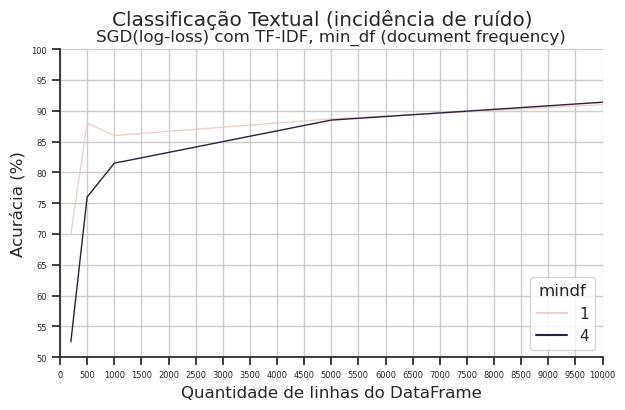

In [7]:
dfMedidasAcuracia = cl.gerarDfMedidasAcuracia(listaAcuraciasDfClasseTexto, listaAcuraciasDfClasseTextoRuido)
listaResultados  += dfMedidasAcuracia.values.tolist()
grAcuracia        = cl.graficoEvolucaoAcuracia(dfMedidasAcuracia, \
                                               'SGD(log-loss) com TF-IDF, min_df (document frequency)', \
                                               False, True, False, False, True)
dfMedidasAcuracia[dfMedidasAcuracia.qtLinhas == 10000]

#### 2. SGD Classifier loss='log_loss' com  Tf-idf com limitadores

In [8]:
valorCorte          = 0.13
tfidf_multiplicador = 1.3
def tfidfComLimitadores(valor_tfidf):
    valorRetorno = 0.0
    if (valor_tfidf >= valorCorte):
        valorRetorno = valor_tfidf*tfidf_multiplicador
       
    return valorRetorno

v_tfidfComLimitadores   = np.vectorize(tfidfComLimitadores)

In [9]:
listaAcuraciasDfClasseTexto      = []
listaAcuraciasDfClasseTextoRuido = []

for i_DfQtLinhas in listaDfQtLinhas:
    #########################################################
    # Dados COM ruído
    #########################################################
    X_treino, X_teste, y_treino, y_teste = \
    cl.dividirTreinoTeste(dfClasseTextoRuido, i_DfQtLinhas)

    # Gerar Matriz Tf-idf
    vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
    cl.gerarMatrizTfidf(X_treino, X_teste, 1)

    # Treinar modelo SGD com Tfidf padrão
    acuracia = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss')
    listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuracia, 'log_loss', 1, False])       

    #########################################################
    # Treinar modelo SGD com Tfidf limitado
    X_treino_tfidf.data    = v_tfidfComLimitadores(X_treino_tfidf.data)
    acuraciaTfidfLimitado = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss')
    
    listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuraciaTfidfLimitado, 'log_loss', 1, True])

,qtLinhas,acuracia,sgd_loss,ruido,mindf,tfidf_limitado
8,10000,91.0,log_loss,True,1,False
9,10000,91.1,log_loss,True,1,True


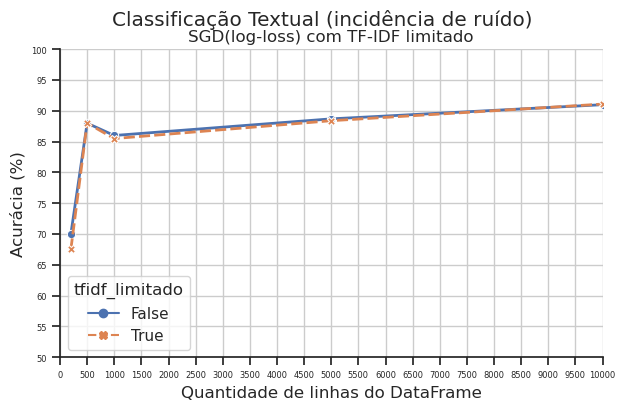

In [10]:
dfMedidasAcuracia = cl.gerarDfMedidasAcuracia(listaAcuraciasDfClasseTexto, listaAcuraciasDfClasseTextoRuido)
listaResultados  += dfMedidasAcuracia.values.tolist()
grAcuracia        = cl.graficoEvolucaoAcuracia(dfMedidasAcuracia, 'SGD(log-loss) com TF-IDF limitado', \
                                               False, False, True, False, True)
dfMedidasAcuracia[dfMedidasAcuracia.qtLinhas == 10000]

#### 3. SGD Classifier loss='log_loss' e loss='hinge' sobre texto COM ruído

In [11]:
listaAcuraciasDfClasseTexto      = []
listaAcuraciasDfClasseTextoRuido = []
for i_DfQtLinhas in listaDfQtLinhas:
    for i_Sgd_loss in listaSgd_loss:
        #########################################################
        # Dados COM ruído
        #########################################################
        X_treino, X_teste, y_treino, y_teste = \
        cl.dividirTreinoTeste(dfClasseTextoRuido, i_DfQtLinhas)

        # Gerar Matriz Tf-idf
        vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
        cl.gerarMatrizTfidf(X_treino, X_teste)

        # Treinar modelo SGD
        acuracia = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, i_Sgd_loss)

        listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuracia, i_Sgd_loss, 1, False])

,qtLinhas,acuracia,sgd_loss,ruido,mindf,tfidf_limitado
8,10000,91.00,log_loss,True,1,False
9,10000,93.05,hinge,True,1,False


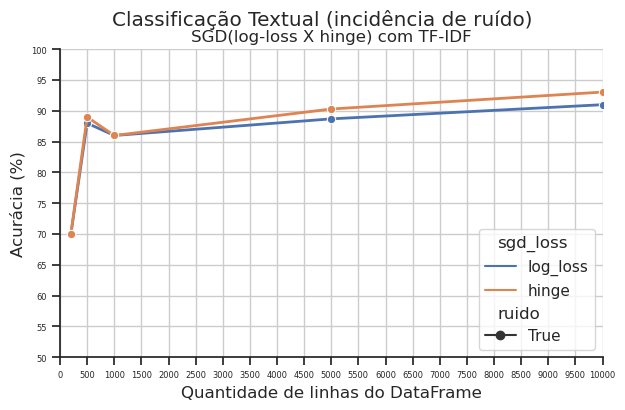

In [12]:
dfMedidasAcuracia = cl.gerarDfMedidasAcuracia(listaAcuraciasDfClasseTexto, listaAcuraciasDfClasseTextoRuido)
listaResultados  += dfMedidasAcuracia.values.tolist()
grAcuracia        = cl.graficoEvolucaoAcuracia(dfMedidasAcuracia, 'SGD(log-loss X hinge) com TF-IDF', \
                                               True, False, False, False, False)
dfMedidasAcuracia[dfMedidasAcuracia.qtLinhas == 10000]

#### Resumo: SGD Classifier loss='hinge', min_df=4 e Tf-idf limitado

In [13]:
listaAcuraciasDfClasseTexto      = []
listaAcuraciasDfClasseTextoRuido = []

for i_DfQtLinhas in listaDfQtLinhas:
    #########################################################
    # Dados COM ruído
    #########################################################
    X_treino, X_teste, y_treino, y_teste = \
    cl.dividirTreinoTeste(dfClasseTextoRuido, i_DfQtLinhas)

    # Gerar Matriz Tf-idf
    vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
    cl.gerarMatrizTfidf(X_treino, X_teste, 1)

    # Treinar modelo SGD loss="log_loss", min_df=1 e Tfidf padrão
    acuracia = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'log_loss')
    listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuracia, 'log_loss', 1, False])       

    #########################################################
    
    # Treinar modelo SGD loss='hinge', min_df=4 e Tf-idf limitado
    vetorizador_tfidf, X_treino_tfidf, X_teste_tfidf = \
    cl.gerarMatrizTfidf(X_treino, X_teste, 4)    
    X_treino_tfidf.data    = v_tfidfComLimitadores(X_treino_tfidf.data)
    acuraciaTfidfLimitado_classificador = cl.treinarModeloSGD(X_treino_tfidf, y_treino, X_teste_tfidf, y_teste, 'hinge', True)
    
    listaAcuraciasDfClasseTextoRuido.append([i_DfQtLinhas, acuraciaTfidfLimitado_classificador[0], 'hinge', 4, True])

In [14]:
dfMedidasAcuracia = cl.gerarDfMedidasAcuracia(listaAcuraciasDfClasseTexto, listaAcuraciasDfClasseTextoRuido)
listaResultados  += dfMedidasAcuracia.values.tolist()

#### Resultados

In [15]:
dfMedidasAcuraciaResultados = pd.DataFrame(listaResultados, \
                                           columns=['qtLinhas', 'acuracia', 'sgd_loss', \
                                                    'ruido', 'mindf', 'tfidf_limitado'])

In [16]:
dfMedidasAcuraciaResultados.drop_duplicates(inplace=True)

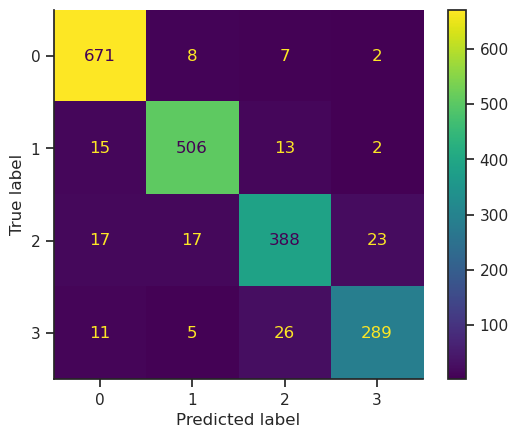

In [17]:
ConfusionMatrixDisplay.from_estimator(acuraciaTfidfLimitado_classificador[1], X_teste_tfidf, y_teste)

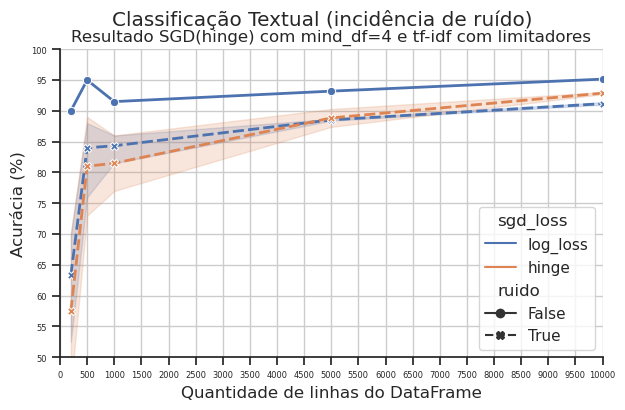

In [18]:
grAcuracia = cl.graficoEvolucaoAcuracia(dfMedidasAcuraciaResultados, \
                                        'Resultado SGD(hinge) com mind_df=4 e tf-idf com limitadores', \
                                        True, False, False, False, False)